In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf
import librosa.display
import librosa

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [35]:
audio_file = 'audio.wav'
x, fs = librosa.load(audio_file, sr=None, mono=True)

#### b) Create a mel filterbank using librosa

In [36]:
sr = fs# from a)
n_fft=512
n_mel = 40
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mel)

#### c) Plot the mel filterbank

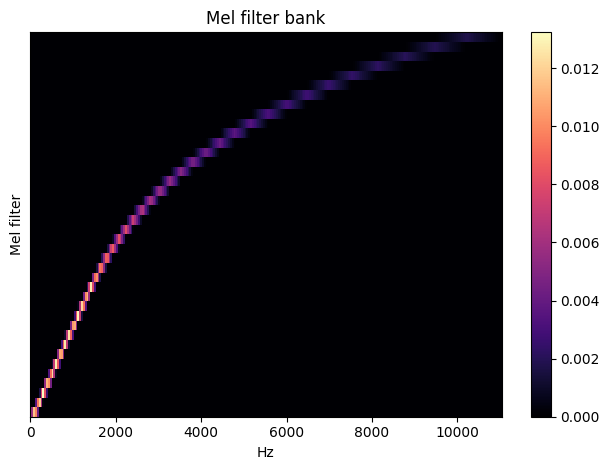

In [37]:
librosa.display.specshow(mel_filterbank, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()

#### Report your observations

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [38]:
pre_emphasis = 0.97
s_ = np.append(x[0], x[1:] - pre_emphasis * x[:-1])

#### b) Implement a stft loop for each frame 

In [39]:
frame_length = int(0.025*sr)
frame_step = frame_length//2
signal_length = len(s_)
n_frames= int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

mfccs = np.zeros((40,n_frames),dtype=np.float32)
power_spectro = np.zeros((n_fft // 2 + 1,n_frames))
mel_spectro = np.zeros((n_mel,n_frames),dtype=np.float32)

for i in np.arange(0,n_frames):
    start_index = i * frame_step
    end_index = start_index + frame_length   
    s_seg = s_[start_index:end_index]             
    s_win_seg = s_seg * signal.hamming(frame_length)# Window each frame using hamming window    
    spectrum  = fft(s_win_seg, n = n_fft)# Calculate fft
    spectrum=spectrum[:n_fft//2+1] 
    power_spectrum = np.abs(spectrum) ** 2# Collect the power spectrum
    power_spectro[:,i] = power_spectrum
    mel_spectrum = np.dot(mel_filterbank, power_spectrum)# Multiply it with the mel filterbank
    mel_spectro[:, i]= mel_spectrum  # Multiply it with the mel filterbank 
    log_mel_spectrum = 20 * np.log10(mel_spectrum + np.finfo(float).eps) # Take log operation
    mfcc = dct(log_mel_spectrum, type = 2, axis = 0, norm = 'ortho')[:40] # Apply DCT
    mfccs[:,i] = mfcc # Keep the first 40 coefficients
 

C:\Users\nguye\AppData\Local\Temp\ipykernel_13952\3686229552.py:14: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  s_win_seg = s_seg * signal.hamming(frame_length)# Window each frame using hamming window


#### c.1) Plot logarithmic power spectrogram

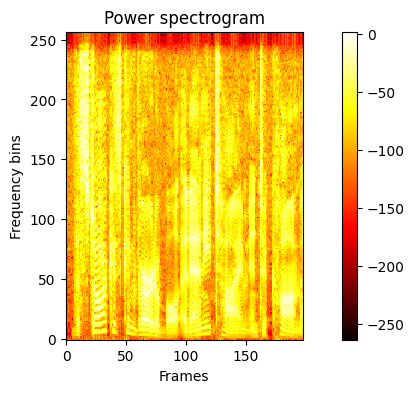

In [40]:
# plot logaritmic power spectrum
plt.figure(figsize=(10,4))
plt.imshow(20*np.log10(power_spectro), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequency bins')
plt.title('Power spectrogram')
plt.colorbar()
plt.show()

#### c.2) Plot mel spectrogram

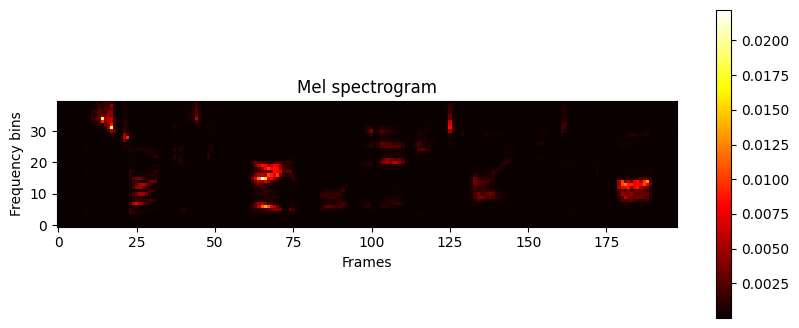

In [41]:
# plot mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectro, cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequency bins')
plt.title('Mel spectrogram')
plt.colorbar()
plt.show()

#### c.3) Plot logarithmic mel spectrogram

In [42]:
#plt.figure(figsize=(10, 4))
#plt.imshow(log_mel_spectrum, cmap='hot', interpolation='nearest', origin='lower')
#plt.xlabel('Frames')
#plt.ylabel('Frequency bins')
#plt.title('Log mel spectrogram')
#plt.colorbar()
#plt.show()

#### c.4) Plot MFCC

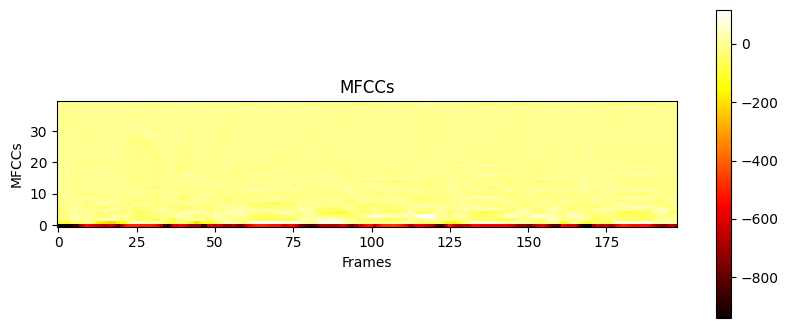

In [43]:
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('MFCCs')
plt.title('MFCCs')
plt.colorbar()
plt.show()

#### d) Implement MFCC using librosa

#### Report your observations

### Bonus problem: Implement your own mel filterbank.